# Analysis of results

Import data:

1. Predicted class probabilities: df_pred_prob
2. Predicted class labels: df_pred_lbl
3. Ground truth labels: df_ground_truth

In [253]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
import opencv
import cv2

df_train_v2 = pd.read_csv('../data/train_v2.csv')

df_ground_truth = pd.read_csv('SimpleCNNtiff_ground_truths.csv')
df_pred_prob = pd.read_csv('SimpleCNNtiff_pred_probs.csv')
df_pred_label = pd.read_csv('SimpleCNNtiff_pred_lbls.csv')

columns = df_ground_truth.columns.values
columns[0]='img'
df_ground_truth.columns = columns
df_pred_prob.columns = columns
df_pred_label.columns = columns

df_text_ground_truth = (df_ground_truth==1)*(columns+',')
df_text_pred_label = (df_pred_label==1)*(columns+',')

index = df_ground_truth.index
df_tags_ground_truth = pd.DataFrame(index=index, columns=['img', 'tags'])
df_tags_ground_truth['img'] = df_ground_truth['img']
df_tags_ground_truth['tags'] = df_text_ground_truth.sum(axis=1) 

df_tags_pred_label = pd.DataFrame(index=index, columns=['img', 'tags'])
df_tags_pred_label['img'] = df_pred_label['img']
df_tags_pred_label['tags'] = df_text_pred_label.sum(axis=1) 
    
df_tags_pred_label.head()

img                                          tags
0    2                                primary,clear,
1    3                                primary,clear,
2    8   cultivation,primary,clear,road,agriculture,
3   10  cultivation,primary,clear,agriculture,water,
4   11                                primary,clear,

Calculations:

1. Predicted labels match groundtruth, where groundtruth label=1: df_match
2. Fraction of matched labels, where groundtruth label=1: fraction_match

In [254]:
df_positive = df_ground_truth > 0
df_negative = df_ground_truth == 0
df_match = df_positive * (df_pred_label == 1)
df_mismatch = df_negative * (df_pred_label == 1)
sum_positive = df_positive.sum(axis=0)
sum_match = df_match.sum(axis=0)
sum_negative = df_negative.sum(axis=0)
sum_mismatch = df_mismatch.sum(axis=0)
fraction_match = sum_match  / sum_positive
fraction_match = fraction_match[1:]

df_sum = pd.DataFrame([sum_positive,sum_match,sum_mismatch], index=['nr in ground truth', 'nr of matches', 'nr of mismatches'])
df_sum = df_sum.T[1:]
df_sum

nr in ground truth  nr of matches  nr of mismatches
blow_down                          98              0                 1
bare_ground                       862            213               952
conventional_mine                 100             13                38
blooming                          332              0                 1
cultivation                      4477           2778              5066
artisinal_mine                    339            234               176
haze                             2697           1899              1732
primary                         37513          37315              1662
slash_burn                        209              0                 3
habitation                       3660           2502              3142
clear                           28431          28116              3782
road                             8071           6792              5240
selective_logging                 340             33               107
partly_cloudy                    7261           6483              2117
agriculture                     12315          11112              6034
water                            7411           5690              3788
cloudy                           2089           1984              2007

Plot number of matched labels per class

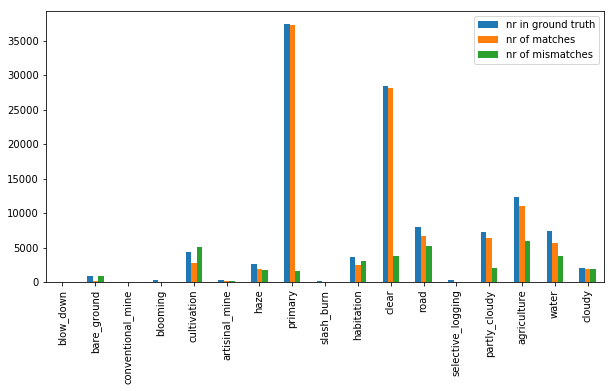

In [261]:
df_sum.plot(kind='bar', figsize=(10, 5))

Plot misclassified images to find clues why they were misclassified.

Cloudy should be easy, so checking those first. Multiple weather classes are predicted, while there can be only one per image.
First images that were wrongly labeled as 'cloudy'.

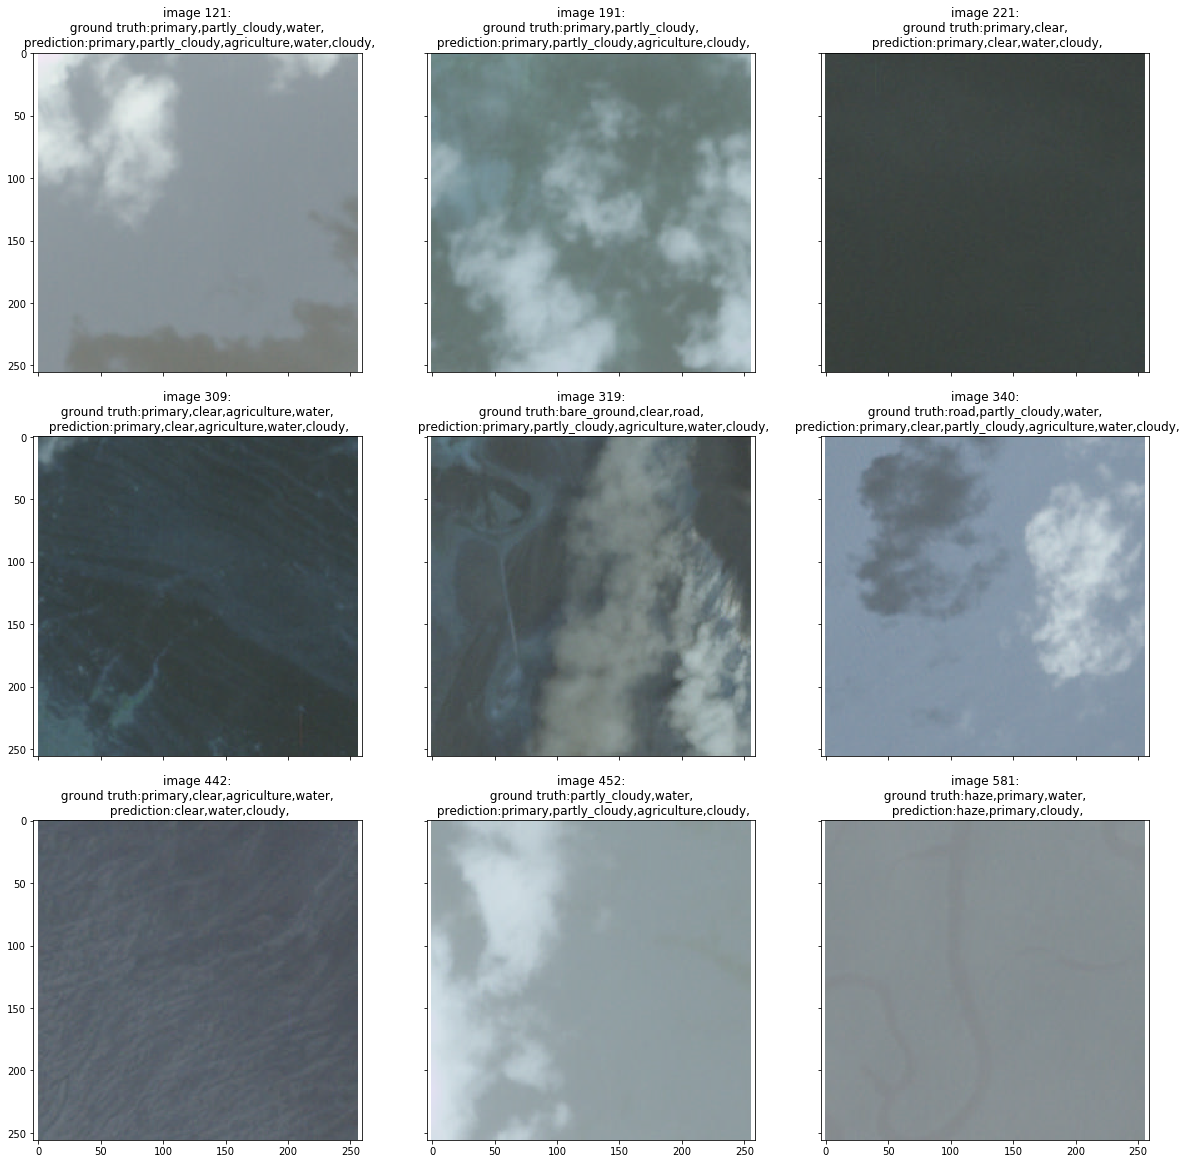

In [268]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))

label = 'cloudy'

i = 0
for f in df_match.index:
    #if df_pred_label[label][f]==0 and df_ground_truth[label][f]==1:
    if df_pred_label[label][f]==1 and df_ground_truth[label][f]==0:
        if i < 9:
            l = df_ground_truth['img'][f]
            img = io.imread('../data/train-jpg/train_{}.jpg'.format(l))
            #img = io.imread('../data/train-tif-v2/train_{}.tif'.format(f))
            ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax[i // 3, i % 3].set_title('image {}:\n ground truth:{} \n prediction:{}'.format(l, df_tags_ground_truth['tags'][f], df_tags_pred_label['tags'][f]))
            #ax[i // 4, i % 4].show()
        i += 1
    
plt.show()

Then images that were wrongly labeled as not 'cloudy'.

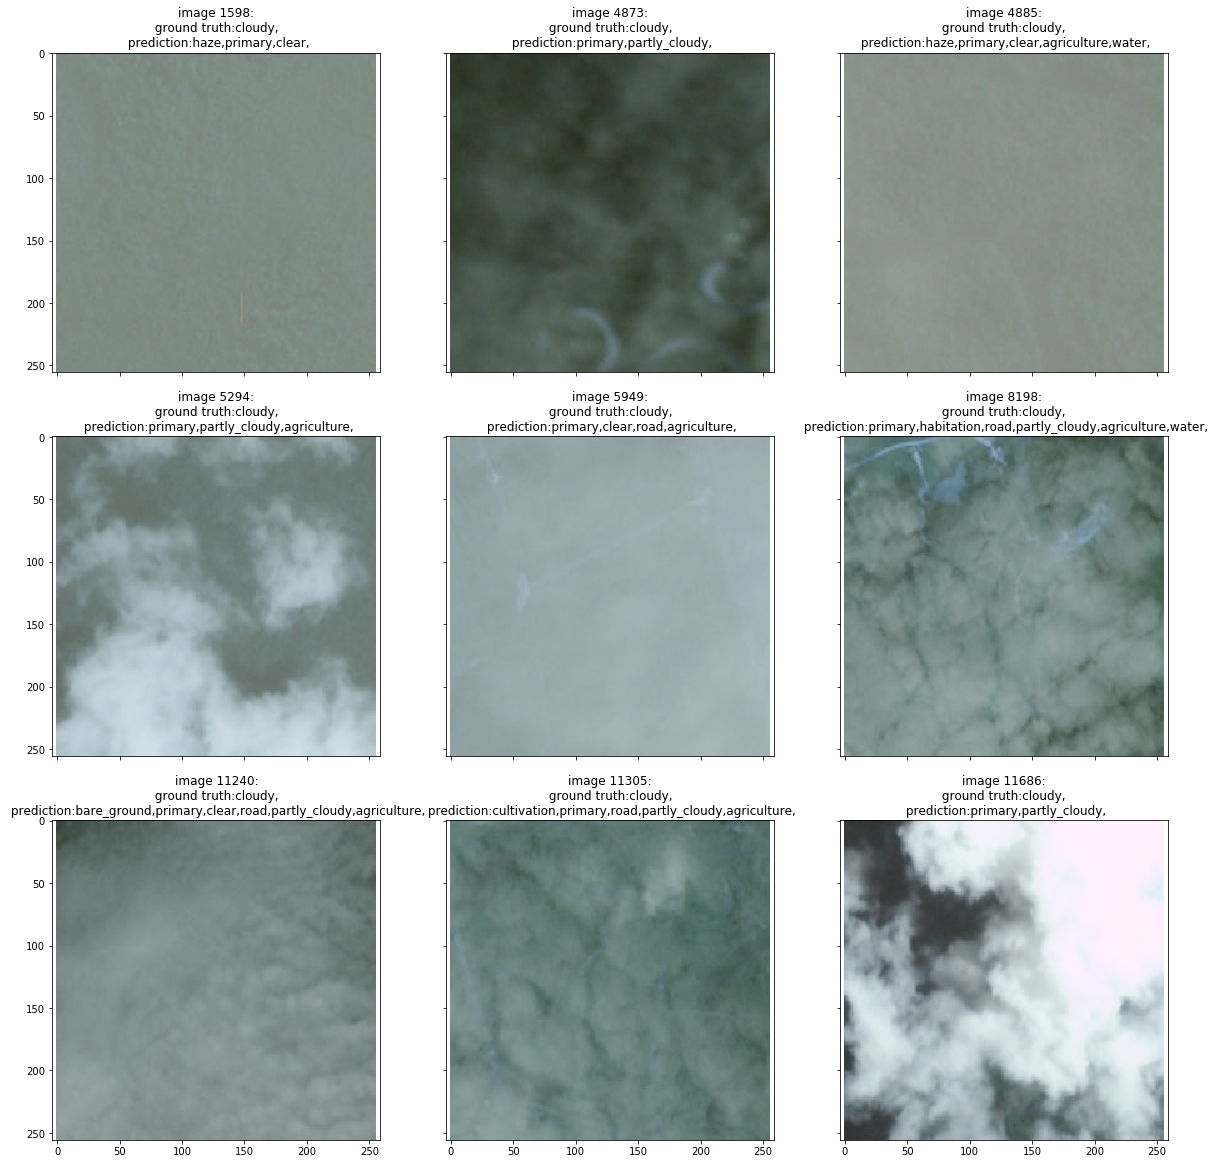

In [267]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))

label = 'cloudy'

i = 0
for f in df_match.index:
    if df_pred_label[label][f]==0 and df_ground_truth[label][f]==1:
    #if df_pred_label[label][f]==1 and df_ground_truth[label][f]==0:
        if i < 9:
            l = df_ground_truth['img'][f]
            img = io.imread('../data/train-jpg/train_{}.jpg'.format(l))
            #img = io.imread('../data/train-tif-v2/train_{}.tif'.format(f))
            ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax[i // 3, i % 3].set_title('image {}:\n ground truth:{} \n prediction:{}'.format(l, df_tags_ground_truth['tags'][f], df_tags_pred_label['tags'][f]))
            #ax[i // 4, i % 4].show()
        i += 1
    
plt.show()

Water seems to be difficult, mismatches below look hard indeed.

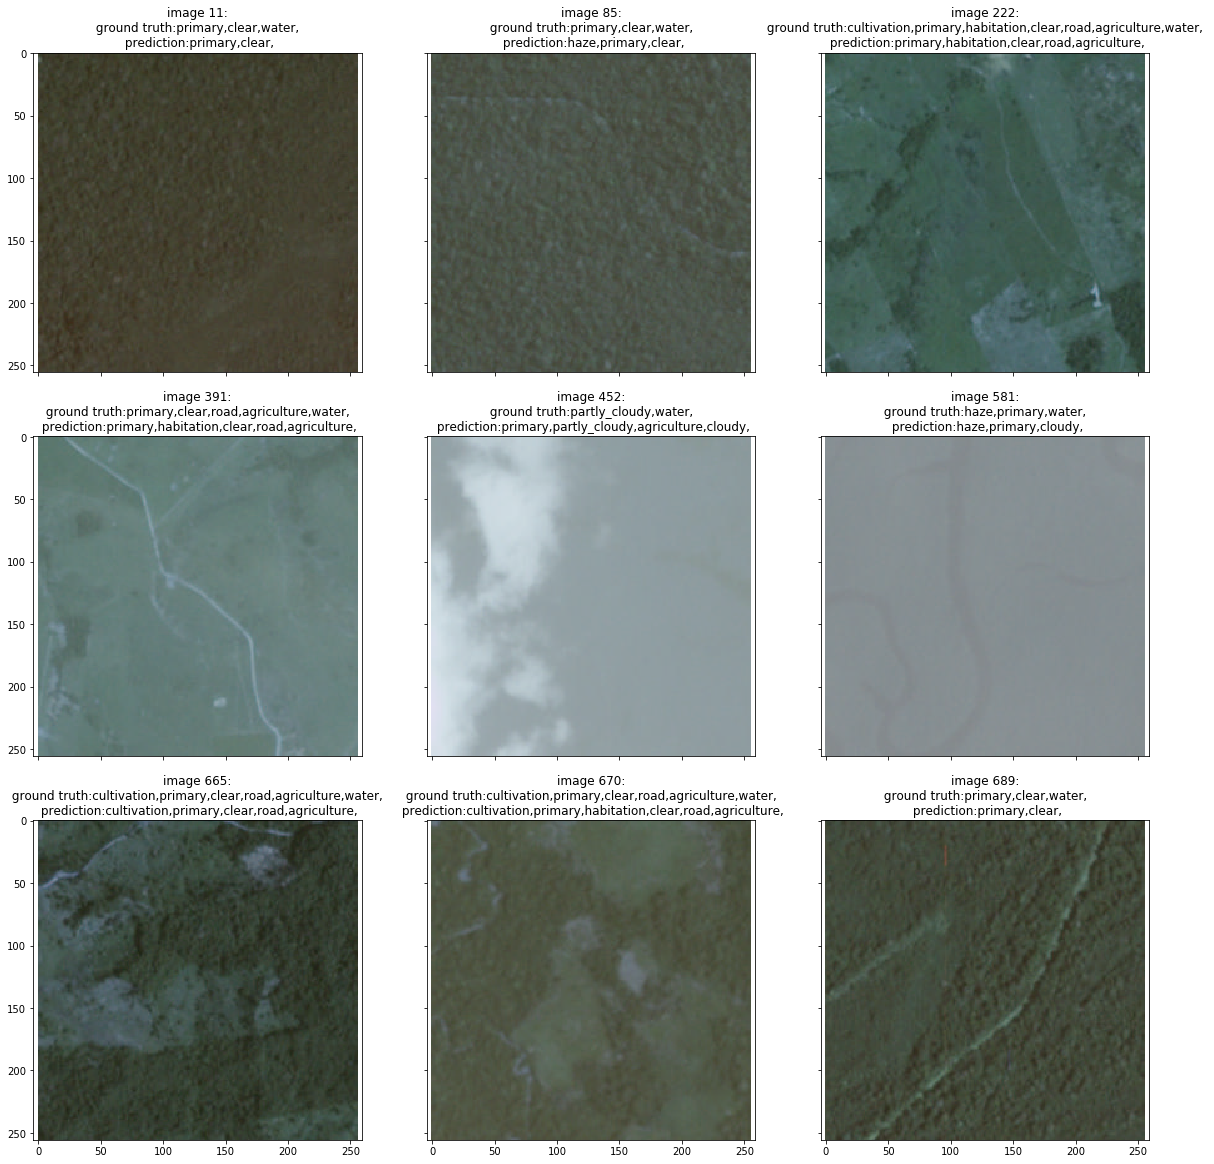

In [257]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))

label = 'water'

i = 0
for f in df_match.index:
    if df_pred_label[label][f]==0 and df_ground_truth[label][f]==1:
    #if df_pred_label[label][f]==1 and df_ground_truth[label][f]==0:
        if i < 9:
            l = df_ground_truth['img'][f]
            img = io.imread('../data/train-jpg/train_{}.jpg'.format(l))
            #img = io.imread('../data/train-tif-v2/train_{}.tif'.format(f))
            ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax[i // 3, i % 3].set_title('image {}:\n ground truth:{} \n prediction:{}'.format(l, df_tags_ground_truth['tags'][f], df_tags_pred_label['tags'][f]))
            #ax[i // 4, i % 4].show()
        i += 1
    
plt.show()

Check misclassified roads. If they are often waterways then a higher resolutiona with the IR signal may help. 

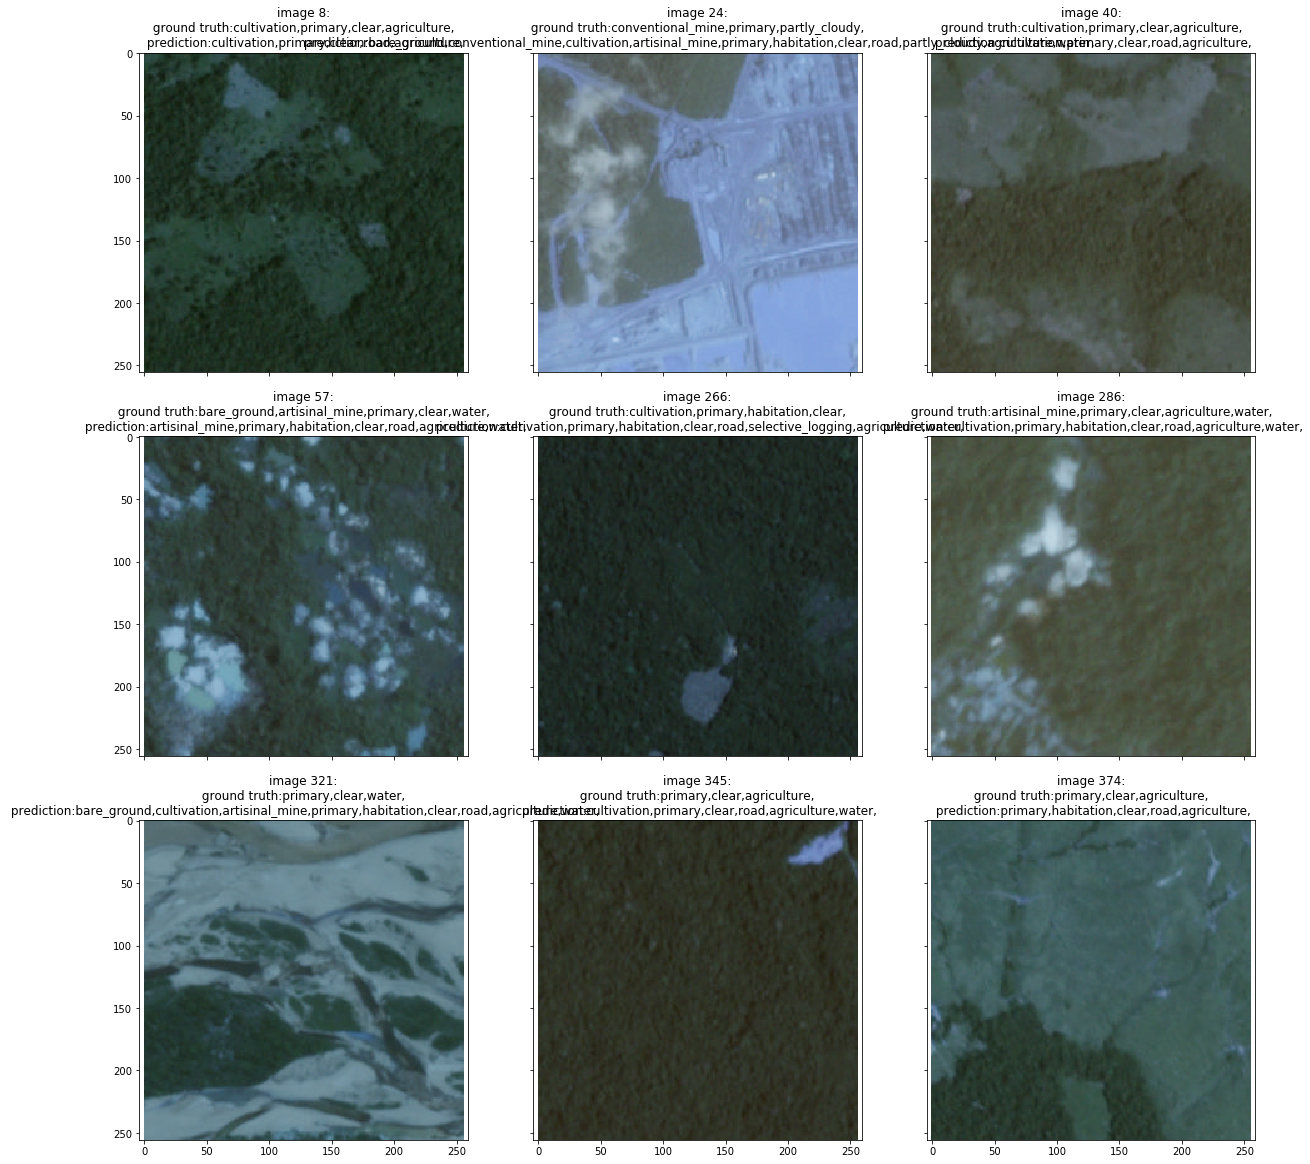

In [264]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))

label = 'road'

i = 0
for f in df_match.index:
    #if df_pred_label[label][f]==0 and df_ground_truth[label][f]==1:
    if df_pred_label[label][f]==1 and df_ground_truth[label][f]==0:
        if i < 9:
            l = df_ground_truth['img'][f]
            img = io.imread('../data/train-jpg/train_{}.jpg'.format(l))
            #img = io.imread('../data/train-tif-v2/train_{}.tif'.format(f))
            ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax[i // 3, i % 3].set_title('image {}:\n ground truth:{} \n prediction:{}'.format(l, df_tags_ground_truth['tags'][f], df_tags_pred_label['tags'][f]))
            #ax[i // 4, i % 4].show()
        i += 1
    
plt.show()